<a href="https://colab.research.google.com/github/ballOneeeee/ksvd/blob/main/Kaptan_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9. PySpark

[Посилання на GitHub]()


In [1]:
!pip install pyspark==3.5.1

1) Завантжатити датасет https://www.kaggle.com/datasets/soheiltehranipour/cruise-used-for-pyspark

2) Виконати основні функції для спарк, побудувати 3 графіки

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('Colab_PySpark')\
    .getOrCreate()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


In [4]:
data = spark.read.csv(
    'cruise_dataset.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [5]:
data.dtypes

[('Ship_name', 'string'),
 ('Cruise_line', 'string'),
 ('Age', 'int'),
 ('Tonnage', 'double'),
 ('passengers', 'double'),
 ('length', 'double'),
 ('cabins', 'double'),
 ('passenger_density', 'double'),
 ('crew', 'double')]

In [6]:
data.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [7]:
data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [8]:
data.count()

158

In [9]:
from pyspark.sql.functions import col

data = data.withColumn('average_cabin_size', col('length') / col('cabins'))

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|average_cabin_size|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|1.6732394366197185|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|1.6732394366197185|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7| 0.971736204576043|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|0.6404569892473118|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|0.6752460257380771|
+-----------+-----------+---+------------------+----------+------+------

In [10]:
data = data.withColumnRenamed('crew', 'Crew')

data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'Crew',
 'average_cabin_size']

In [11]:
# data = data.drop('average_cabin_size')

In [12]:
from pyspark.sql.functions import mean

# data = data.na.drop()

data = data.na.fill({'Tonnage': data.select(mean(col('Tonnage'))).collect()[0][0]})

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|Crew|average_cabin_size|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|1.6732394366197185|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|1.6732394366197185|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7| 0.971736204576043|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|0.6404569892473118|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|0.6752460257380771|
+-----------+-----------+---+------------------+----------+------+------

In [13]:
data.select(['Tonnage', 'length']).show(5)

+------------------+------+
|           Tonnage|length|
+------------------+------+
|30.276999999999997|  5.94|
|30.276999999999997|  5.94|
|            47.262|  7.22|
|             110.0|  9.53|
|           101.353|  8.92|
+------------------+------+
only showing top 5 rows



In [14]:
data.filter(
    (col('Tonnage') > 100) & (col('length').between(6, 9))
).show()

+---------+-----------+---+-------+----------+------+------+-----------------+-----+------------------+
|Ship_name|Cruise_line|Age|Tonnage|passengers|length|cabins|passenger_density| Crew|average_cabin_size|
+---------+-----------+---+-------+----------+------+------+-----------------+-----+------------------+
|  Destiny|   Carnival| 17|101.353|     26.42|  8.92| 13.21|            38.36| 10.0|0.6752460257380771|
|  Triumph|   Carnival| 14|101.509|     27.58|  8.93| 13.21|            36.81| 10.0| 0.676003028009084|
|  Victory|   Carnival| 13|101.509|     27.58|  8.93| 13.79|            36.81| 11.5|0.6475707034082668|
|  Fortuna|      Costa| 10|  105.0|      27.2|   8.9| 13.56|             38.6|10.68|0.6563421828908554|
|   Magica|      Costa|  9|  105.0|      27.2|   8.9| 13.56|             38.6|10.68|0.6563421828908554|
|  Ventura|        P&O|  5|  115.0|     35.74|   9.0| 15.32|            32.18| 12.2|0.5874673629242819|
+---------+-----------+---+-------+----------+------+------+----

In [15]:
from pyspark.sql.functions import when

data.select('Ship_name', 'length', when(col('length') > 7, 1).otherwise(0).alias('large_length')).show(5)

+-----------+------+------------+
|  Ship_name|length|large_length|
+-----------+------+------------+
|    Journey|  5.94|           0|
|      Quest|  5.94|           0|
|Celebration|  7.22|           1|
|   Conquest|  9.53|           1|
|    Destiny|  8.92|           1|
+-----------+------+------------+
only showing top 5 rows



In [16]:
data.filter(col('Ship_name').rlike('^[L|R]')).show(5)

+---------+----------------+---+-------+----------+------+------+-----------------+----+------------------+
|Ship_name|     Cruise_line|Age|Tonnage|passengers|length|cabins|passenger_density|Crew|average_cabin_size|
+---------+----------------+---+-------+----------+------+------+-----------------+----+------------------+
|   Legend|        Carnival| 11|   86.0|     21.24|  9.63| 10.62|            40.49| 9.3|0.9067796610169493|
| Liberty*|        Carnival|  8|  110.0|     29.74|  9.51| 14.87|            36.99|11.6|0.6395427034297243|
|Romantica|           Costa| 20| 53.049|     13.44|  7.22|  6.78|            39.47| 6.0| 1.064896755162242|
|Rotterdam|Holland_American| 16| 59.652|      13.2|  7.77|   6.6|            45.19|6.44|1.1772727272727272|
|   Ryndam|Holland_American| 19| 55.451|     12.66|  7.19|  6.33|             43.8|5.88|1.1358609794628753|
+---------+----------------+---+-------+----------+------+------+-----------------+----+------------------+
only showing top 5 rows



In [17]:
data.groupBy("Cruise_line").mean("crew").show()

+-----------------+------------------+
|      Cruise_line|         avg(crew)|
+-----------------+------------------+
|            Costa|               7.7|
|              P&O| 8.588333333333333|
|           Cunard|10.246666666666668|
|Regent_Seven_Seas|             3.146|
|              MSC|              7.54|
|         Carnival| 10.13590909090909|
|          Crystal|             5.905|
|           Orient|               3.5|
|         Princess|  9.32235294117647|
|        Silversea|            2.4725|
|         Seabourn|1.6000000000000003|
| Holland_American| 6.215000000000002|
|         Windstar|1.1866666666666668|
|           Disney|              9.45|
|        Norwegian| 8.087692307692308|
|          Oceania|               4.0|
|          Azamara|              3.55|
|        Celebrity|             8.072|
|             Star| 5.363333333333333|
|  Royal_Caribbean|10.016521739130434|
+-----------------+------------------+



In [18]:
from pyspark.sql import functions as f

data.groupBy('Cruise_line') \
    .agg(
        f.min('Tonnage').alias('Min_Tonnage'),
        f.max('Tonnage').alias('Max_Tonnage'),
        f.avg('Tonnage').alias('Avg_Tonnage')
    ).show(truncate=False)

+-----------------+------------------+------------------+------------------+
|Cruise_line      |Min_Tonnage       |Max_Tonnage       |Avg_Tonnage       |
+-----------------+------------------+------------------+------------------+
|Costa            |25.0              |112.0             |71.09654545454545 |
|P&O              |45.0              |115.0             |77.85883333333334 |
|Cunard           |70.327            |151.4             |103.90899999999999|
|Regent_Seven_Seas|12.5              |50.0              |32.14             |
|MSC              |16.852            |133.5             |63.77225          |
|Carnival         |46.052            |110.23899999999999|84.65272727272728 |
|Crystal          |51.004            |68.0              |59.501999999999995|
|Orient           |22.08             |22.08             |22.08             |
|Princess         |30.276999999999997|116.0             |87.53800000000001 |
|Silversea        |16.8              |25.0              |20.9              |

In [19]:
from matplotlib import pyplot as plt

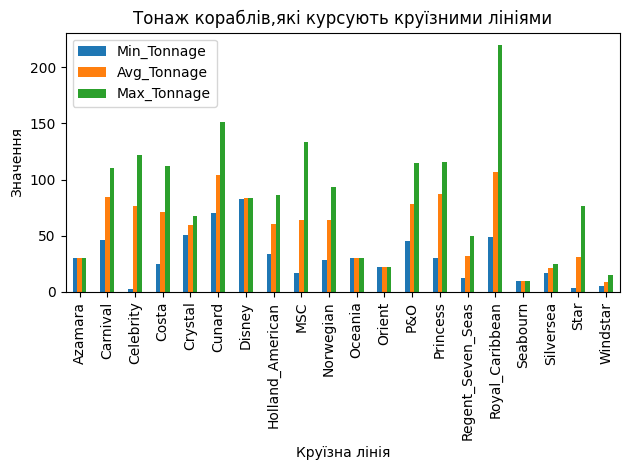

In [20]:
df_1 = data.groupBy('Cruise_line').agg(
    f.min('Tonnage').alias('Min_Tonnage'),
    f.max('Tonnage').alias('Max_Tonnage'),
    f.avg('Tonnage').alias('Avg_Tonnage'))

df_1 = df_1.toPandas()

df_group = df_1.groupby('Cruise_line').mean(numeric_only=True).reset_index()

df_group.plot(kind='bar', x='Cruise_line', y=['Min_Tonnage', 'Avg_Tonnage', 'Max_Tonnage'],
              ylabel='Значення', xlabel='Круїзна лінія')
plt.title('Тонаж кораблів,які курсують круїзними лініями')
plt.tight_layout()
plt.show()

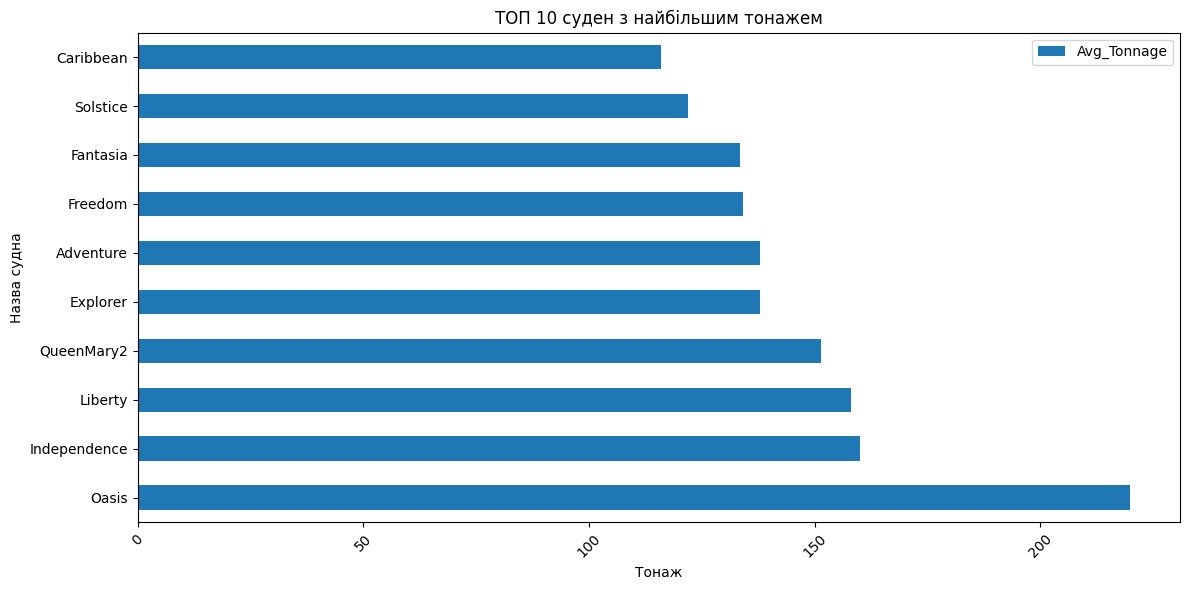

In [21]:
df_2 = data.groupBy('Ship_name').agg(
        f.avg('Tonnage').alias('Avg_Tonnage')).toPandas()

df_2 = df_2.sort_values('Avg_Tonnage', ascending=False).head(10)

df_2.plot(kind='barh', x='Ship_name', y='Avg_Tonnage', ylabel='Назва судна',
        xlabel='Тонаж',  figsize=(12, 6))

plt.title('ТОП 10 суден з найбільшим тонажем')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

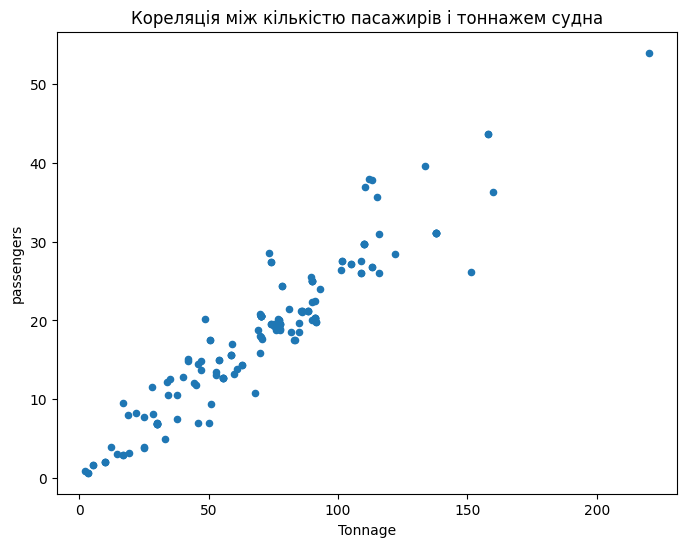

In [22]:
df = data.toPandas()

df.plot(kind='scatter', x='Tonnage', y='passengers', figsize=(8, 6))
plt.title('Кореляція між кількістю пасажирів і тоннажем судна')
plt.show()

Запис/збереження даних у файл

In [ ]:
# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Записвибраних даних в різні види файлів

# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.csv('dataset.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')